In [1]:
import numpy as np
from scipy import sparse
"""Reservoir Properties:


function [L,W,h,rw,dt,NX,NY,mu,Bw,ct,t,Pi,Porosity,Permeability] = reservoir_properties()
NX=input('How many X grid blocks: ')
NY=input('How many Y grid blocks: ')
 
L=input('Length of Reservoir: ')
W=input('Width of Reservoir: ')
h=input('Height of Reservoir: ')
rw=input('Wellbore Radius: ')
dt=input('Time step: ')
mu=input('Viscosity: ')
Bw=input('Formation Volume Factor: ')
ct=input('Total Compressibility: ')
Pi=input('Initial Pressure: ')
Porosity=input('Porosity: ')
Permeability=input('Permeability: ')
t=input('Time: ')
 
 
end"""

def Res_properties():
    NX = 15
    NY = 15

    L = 20000
    W = 20000
    h = 300
    rw = float(.25)
    dt = float(1)
    mu = float(1)
    Bw = float(1.36)
    ct = float(1e-06)
    Pi = int(3000)
    Porosity = (np.ones([NX, NY])*.3).T
    Permeability = (np.ones([NX, NY])*75).T
    t = int(100)
    #n = int(input('Number of wells: '))
    n = 5

    return NX, NY, L, W, h, rw, dt, mu, Bw, ct, Pi, Porosity, Permeability, t, n


NX, NY, L, W, h, rw, dt, mu, Bw, ct, Pi, Porosity, Permeability, t, n = Res_properties()

dx = L/NX
dy = W/NY

Area_x = h*dx
Area_y = h*dy

def ref_grid(NX,NY):
    N = NX*NY
    grid = np.zeros([NX,NY])
    for i in range(NX):
        for j in range(NY):
            grid[i,j] = NY*(NX - 1 - i) + (j+1)
    return grid       

grid = ref_grid(NX,NY)
print(grid)

[[ 211.  212.  213.  214.  215.  216.  217.  218.  219.  220.  221.  222.
   223.  224.  225.]
 [ 196.  197.  198.  199.  200.  201.  202.  203.  204.  205.  206.  207.
   208.  209.  210.]
 [ 181.  182.  183.  184.  185.  186.  187.  188.  189.  190.  191.  192.
   193.  194.  195.]
 [ 166.  167.  168.  169.  170.  171.  172.  173.  174.  175.  176.  177.
   178.  179.  180.]
 [ 151.  152.  153.  154.  155.  156.  157.  158.  159.  160.  161.  162.
   163.  164.  165.]
 [ 136.  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.  147.
   148.  149.  150.]
 [ 121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.  132.
   133.  134.  135.]
 [ 106.  107.  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.
   118.  119.  120.]
 [  91.   92.   93.   94.   95.   96.   97.   98.   99.  100.  101.  102.
   103.  104.  105.]
 [  76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.   87.
    88.   89.   90.]
 [  61.   62.   63.   64.   65.   66.   67.   68. 

In [2]:
def T_inter(Permeability, Permeability_2, mu, Bw, dx, Area):
    if Permeability == 0 or Permeability_2 == 0:
        t_inter = 0
    else:
        k_inter = 2*(1/float(Permeability) + 1/float(Permeability_2))**(-1)
        t_inter = k_inter*Area/(mu*Bw*dx)*(6.33e-03)
    return t_inter



In [3]:
def T_array(NX, NY, Permeability, mu, Bw, dx, dy, Area_x, Area_y):
    N = NX*NY
    T = np.zeros([N, N])
    # T = sparse.csr_matrix(T)

    for i in range(N):
        print(i)
        if (i+1) - NX > 0:  # shows above bottom edge 4 - 9
            T[i, i-NX] = -T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                  Permeability[3-m.floor((i)/NX),i-m.floor(i/NX)*NX],
                                mu, Bw, dy, Area_x)
            T[i, i] = T[i, i] + T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                        Permeability[3-m.floor((i)/NX),i-m.floor(i/NX)*NX],
                                mu, Bw, dy, Area_x)

            
        
        if (i+1) + NX <= N:    # shows below top edge 1 - 6

            T[i, i+NX] = -T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                  Permeability[1-m.floor((i)/NX),i-m.floor(i/NX)*NX],
                                mu, Bw, dy, Area_x)
            T[i, i] = T[i, i] + T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                        Permeability[1-m.floor((i)/NX),i-m.floor(i/NX)*NX],
                                mu, Bw, dy, Area_x)

            
            
        if (i+1)%NX != 0:     # Shows neighbors of right edge 1 - 2, 4 - 5, 7 - 8 
            T[i, i+1] = -T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX+1],
                                mu, Bw, dx, Area_y)
            T[i, i] = T[i, i] + T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                        Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX+1],
                                mu, Bw, dx, Area_y)

            
            
        if (i+1)%NX != 1:      # shows neighbors of left edge 2 - 3, 5 - 6, 8 - 9
            T[i, i-1] = -T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                 Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX-1],
                                mu, Bw, dx, Area_y)
            T[i, i] = T[i, i] + T_inter(Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX], 
                                        Permeability[2-m.floor((i)/NX),i-m.floor(i/NX)*NX-1],
                                mu, Bw, dx, Area_y)

            
            

    return T



In [4]:
def inter_transm(Permeability, Porosity, NX, NY, t, W, L, h, mu, Bw, dt, ct, Pi, dx, dy, Q, J, B):
    
    
    T = T_array(NX,NY,Permeability,mu,Bw,dx,dy,Area_x,Area_y);
    # T=sparse(T);
    
    Permeability = Permeability.reshape(1, NX*NY)
    Porosity = Porosity.reshape(1, NX*NY)
    
    P_0 = np.ones([NX*NY,1])*Pi
    P_n = P_0
    
    P = np.zeros([NX*NY,t+1])
    
    P[:,0] = P_0.transpose()
    for i in range(t):
        a = T + J + B/dt
        b = np.dot((B/dt),P_n)+Q
        P_nplus1 = np.linalg.solve(a,b)
        P_n = P_nplus1
        P[:,i+1] = P_nplus1.transpose()
    
    x = [i*L/(NX-1) for i in range(NX)]
    y = [i*W/(NY-1) for i in range(NY)]
    
    return P, x, y, T




In [5]:
import math as m
from scipy import sparse
import random

NX, NY, L, W, h, rw, dt, mu, Bw, ct, Pi, Porosity, Permeability, t, n = Res_properties()

wells = np.zeros([n, 4])
Q = np.zeros([NX*NY, 1])
J = np.zeros([NX*NY, NX*NY])


x_loc = []
y_loc = []
welltype = []
oper_con = []
print(x_loc, y_loc, welltype, oper_con)

for i in range(n):
    print('well ' + str(i))
    #x_loc.append(int(input('X location of Well: ')))
    x_loc = [5000, 15000, 5000, 15000, 10000]
    #y_loc.append(int(input('Y location of Well: ')))
    y_loc = [5000, 5000, 15000, 15000, 10000]
    #welltype.append(int(input('BHP (1) or Injector (2)? ')))
    welltype = [1, 1, 1, 1, 2]
    #oper_con.append(int(input('Operating condition (ft^3/day or psi): ')))
    oper_con = [1000, 1000, 1000, 1000, 8000]
    print(x_loc, y_loc, welltype, oper_con)
    wells[i,:] = [x_loc[i], y_loc[i], welltype[i], oper_con[i]]
    print(wells[i, :])
    l = (m.ceil(y_loc[i]/dy)-1)*NX+m.ceil(x_loc[i]/dx)-1 
    print('l = ' + str(l))
    if welltype[i] == 1:
        J[l,l] = (6.33e-3)*(2*m.pi*Permeability[2-m.floor((i)/3),i-m.floor(i/3)*3]*h)/(mu*Bw*m.log(.28/2*(dx**2+dy**2)**(1/2)/rw))
        Q[l] = J[l,l]*oper_con[i]
    else:
        Q[l] = oper_con[i]
        
                # Q = sparse.csr_matrix(Q)
                # J = sparse.csr_matrix(J)


#print('If type = 1, then BHP.  If type = 2, then Injector.')
#print('    X Location       Y Location       Type             Operating Condition')
#print(wells)

                # B = sparse(B);

B = np.diagflat(Porosity.reshape(1,NX*NY)*dx*dy*h*ct/Bw)
                # B = sparse.csr_matrix(B)

P, x, y, T = inter_transm(Permeability, Porosity, NX, NY, t, W, L, h, mu, Bw, dt, ct, Pi, dx, dy, Q, J, B)

X,Y = np.meshgrid(x,y)

P_time_3 = P[:,3].reshape([NX,NY])
P_time_20 = P[:,20].reshape([NX,NY])
P_time_50 = P[:,50].reshape([NX,NY])
#print('Perm = ' + str(Permeability))

Q_time = np.zeros([t,welltype.count(1)])
P_time = np.zeros([t,n])

for i in range(n):
    l=(m.ceil(y_loc[i]/dy)-1)*NX+m.ceil(x_loc[i]/dx)-1
    
    if welltype[i] == 1:
        for t_p in range(t):
            Q_time[t_p,i-welltype[:i].count(2)] = J[l,l]*(P[l,t_p]-oper_con[i])
            
    elif welltype[i] == 2:
        for t_p in range(t):
            J[l,l] = 6.33e-3*(2*m.pi*Permeability[2-m.floor((i)/3),i-m.floor(i/3)*3]*h)/(mu*Bw*m.log(.28/2*(dx**2+dy**2)**(1/2)/rw))
            P_time[t_p,i] = P[l,t_p] + (oper_con[i]/J[l,l])
            


[] [] [] []
well 0
[5000, 15000, 5000, 15000, 10000] [5000, 5000, 15000, 15000, 10000] [1, 1, 1, 1, 2] [1000, 1000, 1000, 1000, 8000]
[  5.00000000e+03   5.00000000e+03   1.00000000e+00   1.00000000e+03]
l = 48
well 1
[5000, 15000, 5000, 15000, 10000] [5000, 5000, 15000, 15000, 10000] [1, 1, 1, 1, 2] [1000, 1000, 1000, 1000, 8000]
[  1.50000000e+04   5.00000000e+03   1.00000000e+00   1.00000000e+03]
l = 56
well 2
[5000, 15000, 5000, 15000, 10000] [5000, 5000, 15000, 15000, 10000] [1, 1, 1, 1, 2] [1000, 1000, 1000, 1000, 8000]
[  5.00000000e+03   1.50000000e+04   1.00000000e+00   1.00000000e+03]
l = 168
well 3
[5000, 15000, 5000, 15000, 10000] [5000, 5000, 15000, 15000, 10000] [1, 1, 1, 1, 2] [1000, 1000, 1000, 1000, 8000]
[  1.50000000e+04   1.50000000e+04   1.00000000e+00   1.00000000e+03]
l = 176
well 4
[5000, 15000, 5000, 15000, 10000] [5000, 5000, 15000, 15000, 10000] [1, 1, 1, 1, 2] [1000, 1000, 1000, 1000, 8000]
[  1.00000000e+04   1.00000000e+04   2.00000000e+00   8.00000000e+03

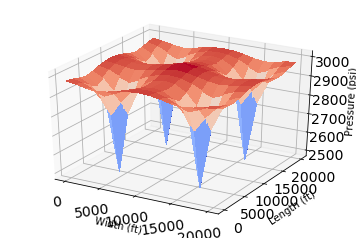

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm, colorbar

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# zs = np.array([(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
# Z = zs.reshape(X.shape)

ax.plot_surface(X.T, Y.T, P_time_3, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

ax.set_xlabel('Width (ft)')
ax.set_ylabel('Length (ft)')
ax.set_zlabel('Pressure (psi)')
plt.tick_params(axis='both', labelsize=14)
plt.xticks(rotation=8)
plt.show()


In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
print(P_time_50.shape)
data = [
    go.Surface(
        z=P_time_50
    )
]

layout = go.Layout(
    title='Nichelik Field',
    autosize=False,
    width=600,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

(27, 21)


import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z_data = z_data[:15]

data = [
    go.Surface(
        z=z_data.as_matrix()
    )
]

layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')


In [207]:
import plotly.plotly as py
from plotly.graph_objs import *

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = Surface(x=x, y=y, z=z)
data = Data([surface])

layout = Layout(
    title='Parametric Plot',
    scene=Scene(
        xaxis=XAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=YAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=ZAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='parametric_plot')